In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#import mysql.connector

In [3]:
#conn=mysql.connector.connect(host="localhost",user= "root",password="Jugalvyas@1991",database="Telecom")

In [4]:
#df=pd.read_sql_query("SELECT * FROM Telecom" where,conn,parse_dates="MyUnknownColumn")

In [5]:
import io
%cd D:\Projects\KPI

D:\Projects\KPI


In [6]:
df=pd.read_csv("Telecom BSC KPI Analysis.csv",parse_dates=["Unnamed: 1"])

In [7]:
df.head(12)

,BSC Name,Unnamed: 1,TCH Assignment Success Rate [BBH],TCH Blocking Rate [BBH],Drop Call Rate [BBH],SDCCH Drop Call Rate [BBH],Total Voice Traffic [BBH],RX Quality [BBH],HOSR[CBBH],SDCCH Blocking Rate [BBH]
0,BSC165KAK,2022-06-18,99.05,0.00,0.55,0.02,1205.72,98.69,99.34,0.00
1,NaN,2022-06-19,99.02,0.53,0.49,0.03,1202.26,98.76,99.35,0.00
2,NaN,2022-06-20,99.06,0.00,0.52,0.02,1186.81,98.73,99.39,0.00
3,NaN,2022-06-21,99.12,0.00,0.72,0.02,1137.52,98.73,99.35,0.00
4,NaN,2022-06-22,99.00,0.00,0.51,0.02,1156.96,98.70,99.38,0.00
5,BSC166NAG,2022-06-18,98.85,0.22,0.66,0.03,3920.49,98.23,98.83,0.01
6,NaN,2022-06-19,98.66,1.47,0.63,0.04,3606.21,98.15,98.96,0.12
7,NaN,2022-06-20,98.70,0.54,0.70,0.04,3810.57,98.01,98.57,0.09
8,NaN,2022-06-21,98.67,0.51,0.73,0.04,4097.37,98.04,98.52,0.05
9,NaN,2022-06-22,98.60,0.09,0.66,0.03,4142.07,98.08,98.54,0.01


In [8]:
df.info()
#we have missing value in column in BSC Name column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 10 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   BSC Name                           50 non-null     object        
 1   Unnamed: 1                         250 non-null    datetime64[ns]
 2   TCH Assignment Success Rate [BBH]  250 non-null    float64       
 3   TCH Blocking Rate [BBH]            250 non-null    float64       
 4   Drop Call Rate [BBH]               250 non-null    float64       
 5   SDCCH Drop Call Rate [BBH]         250 non-null    float64       
 6   Total Voice Traffic [BBH]          250 non-null    float64       
 7   RX Quality [BBH]                   250 non-null    float64       
 8   HOSR[CBBH]                         250 non-null    float64       
 9   SDCCH Blocking Rate [BBH]          250 non-null    float64       
dtypes: datetime64[ns](1), float64(8), obje

In [9]:
df["BSC Name"]=df["BSC Name"].fillna(method="ffill",limit=4)
#filling Missing value

In [10]:
df.head(12)

,BSC Name,Unnamed: 1,TCH Assignment Success Rate [BBH],TCH Blocking Rate [BBH],Drop Call Rate [BBH],SDCCH Drop Call Rate [BBH],Total Voice Traffic [BBH],RX Quality [BBH],HOSR[CBBH],SDCCH Blocking Rate [BBH]
0,BSC165KAK,2022-06-18,99.05,0.00,0.55,0.02,1205.72,98.69,99.34,0.00
1,BSC165KAK,2022-06-19,99.02,0.53,0.49,0.03,1202.26,98.76,99.35,0.00
2,BSC165KAK,2022-06-20,99.06,0.00,0.52,0.02,1186.81,98.73,99.39,0.00
3,BSC165KAK,2022-06-21,99.12,0.00,0.72,0.02,1137.52,98.73,99.35,0.00
4,BSC165KAK,2022-06-22,99.00,0.00,0.51,0.02,1156.96,98.70,99.38,0.00
5,BSC166NAG,2022-06-18,98.85,0.22,0.66,0.03,3920.49,98.23,98.83,0.01
6,BSC166NAG,2022-06-19,98.66,1.47,0.63,0.04,3606.21,98.15,98.96,0.12
7,BSC166NAG,2022-06-20,98.70,0.54,0.70,0.04,3810.57,98.01,98.57,0.09
8,BSC166NAG,2022-06-21,98.67,0.51,0.73,0.04,4097.37,98.04,98.52,0.05
9,BSC166NAG,2022-06-22,98.60,0.09,0.66,0.03,4142.07,98.08,98.54,0.01


In [11]:
df.rename({"Unnamed: 1" : "Date"},axis=1, inplace=True)

In [12]:
df.head()

,BSC Name,Date,TCH Assignment Success Rate [BBH],TCH Blocking Rate [BBH],Drop Call Rate [BBH],SDCCH Drop Call Rate [BBH],Total Voice Traffic [BBH],RX Quality [BBH],HOSR[CBBH],SDCCH Blocking Rate [BBH]
0,BSC165KAK,2022-06-18,99.05,0.00,0.55,0.02,1205.72,98.69,99.34,0.0
1,BSC165KAK,2022-06-19,99.02,0.53,0.49,0.03,1202.26,98.76,99.35,0.0
2,BSC165KAK,2022-06-20,99.06,0.00,0.52,0.02,1186.81,98.73,99.39,0.0
3,BSC165KAK,2022-06-21,99.12,0.00,0.72,0.02,1137.52,98.73,99.35,0.0
4,BSC165KAK,2022-06-22,99.00,0.00,0.51,0.02,1156.96,98.70,99.38,0.0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 10 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   BSC Name                           250 non-null    object        
 1   Date                               250 non-null    datetime64[ns]
 2   TCH Assignment Success Rate [BBH]  250 non-null    float64       
 3   TCH Blocking Rate [BBH]            250 non-null    float64       
 4   Drop Call Rate [BBH]               250 non-null    float64       
 5   SDCCH Drop Call Rate [BBH]         250 non-null    float64       
 6   Total Voice Traffic [BBH]          250 non-null    float64       
 7   RX Quality [BBH]                   250 non-null    float64       
 8   HOSR[CBBH]                         250 non-null    float64       
 9   SDCCH Blocking Rate [BBH]          250 non-null    float64       
dtypes: datetime64[ns](1), float64(8), obje

In [14]:
df.set_index("Date",inplace=True)

In [15]:
df.head()

,BSC Name,TCH Assignment Success Rate [BBH],TCH Blocking Rate [BBH],Drop Call Rate [BBH],SDCCH Drop Call Rate [BBH],Total Voice Traffic [BBH],RX Quality [BBH],HOSR[CBBH],SDCCH Blocking Rate [BBH]
Date,,,,,,,,,
2022-06-18,BSC165KAK,99.05,0.00,0.55,0.02,1205.72,98.69,99.34,0.0
2022-06-19,BSC165KAK,99.02,0.53,0.49,0.03,1202.26,98.76,99.35,0.0
2022-06-20,BSC165KAK,99.06,0.00,0.52,0.02,1186.81,98.73,99.39,0.0
2022-06-21,BSC165KAK,99.12,0.00,0.72,0.02,1137.52,98.73,99.35,0.0
2022-06-22,BSC165KAK,99.00,0.00,0.51,0.02,1156.96,98.70,99.38,0.0


In [16]:
#let,s see All KPI of all data on 18-June
df["2022-06-18"]

C:\Users\hp\AppData\Local\Temp/ipykernel_22516/3113069642.py:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df["2022-06-18"]


,BSC Name,TCH Assignment Success Rate [BBH],TCH Blocking Rate [BBH],Drop Call Rate [BBH],SDCCH Drop Call Rate [BBH],Total Voice Traffic [BBH],RX Quality [BBH],HOSR[CBBH],SDCCH Blocking Rate [BBH]
Date,,,,,,,,,
2022-06-18,BSC165KAK,99.05,0.00,0.55,0.02,1205.72,98.69,99.34,0.00
2022-06-18,BSC166NAG,98.85,0.22,0.66,0.03,3920.49,98.23,98.83,0.01
2022-06-18,BSC167SRA,98.90,0.02,0.96,0.02,1568.21,97.84,98.96,0.10
2022-06-18,BSC168ASK,98.79,0.10,0.47,0.03,8484.77,98.14,98.48,0.01
2022-06-18,BSC169GWL,98.45,0.55,0.62,0.08,3591.77,98.13,97.76,0.03
2022-06-18,BSC170SEN,98.79,0.02,0.90,0.03,5787.16,98.47,98.41,0.00
2022-06-18,BSC171SNM,98.97,0.07,0.69,0.03,3170.47,98.55,98.54,0.01
2022-06-18,BSC172KHN,99.15,0.03,0.57,0.02,1722.33,98.82,98.61,0.00
2022-06-18,BSC173AMB,98.19,1.34,1.19,0.10,6290.38,97.44,96.55,0.13


In [17]:
df["2022-06-18":"2022-06-19"]
#Data for 18 and 19June]

,BSC Name,TCH Assignment Success Rate [BBH],TCH Blocking Rate [BBH],Drop Call Rate [BBH],SDCCH Drop Call Rate [BBH],Total Voice Traffic [BBH],RX Quality [BBH],HOSR[CBBH],SDCCH Blocking Rate [BBH]
Date,,,,,,,,,
2022-06-18,BSC165KAK,99.05,0.00,0.55,0.02,1205.72,98.69,99.34,0.00
2022-06-19,BSC165KAK,99.02,0.53,0.49,0.03,1202.26,98.76,99.35,0.00
2022-06-18,BSC166NAG,98.85,0.22,0.66,0.03,3920.49,98.23,98.83,0.01
2022-06-19,BSC166NAG,98.66,1.47,0.63,0.04,3606.21,98.15,98.96,0.12
2022-06-18,BSC167SRA,98.90,0.02,0.96,0.02,1568.21,97.84,98.96,0.10
...,...,...,...,...,...,...,...,...,...
2022-06-19,BSC237RPR,98.98,0.02,0.56,0.04,7819.80,98.44,98.15,0.00
2022-06-18,BSC245JBL,98.88,0.09,0.92,0.02,11955.48,98.35,98.03,0.22
2022-06-19,BSC245JBL,98.77,0.36,0.84,0.02,11599.41,98.39,98.18,0.38


In [18]:
#Lets see average Voice Traffic on 18-june-2022 in MP Circle
df["2022-06-18"]["Total Voice Traffic [BBH]"].mean()
#Average Voice Traffic in MP circle on 18th June was 6400.3192

C:\Users\hp\AppData\Local\Temp/ipykernel_22516/859494220.py:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df["2022-06-18"]["Total Voice Traffic [BBH]"].mean()


6400.319200000001

In [19]:
#Lets see simillarly on all dates from 18 to 22 June.
df["2022-06-18":]["Total Voice Traffic [BBH]"].mean()

6399.295600000001

<AxesSubplot:>

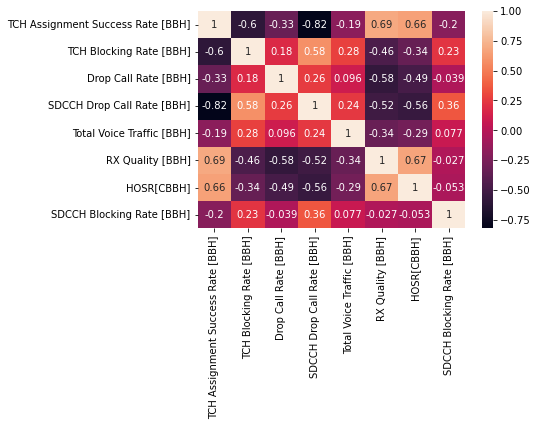

In [20]:
sns.heatmap(df.corr(),annot=True)
#We can see correlation between some volumns like [SDCCH Drop Rate and TCH Assignment Success Rate [BBH]

In [21]:
#Lets see simillarly on all dates from 18 to 22 June.
df["2022-06-18":]["Total Voice Traffic [BBH]"].mean()

6399.295600000001

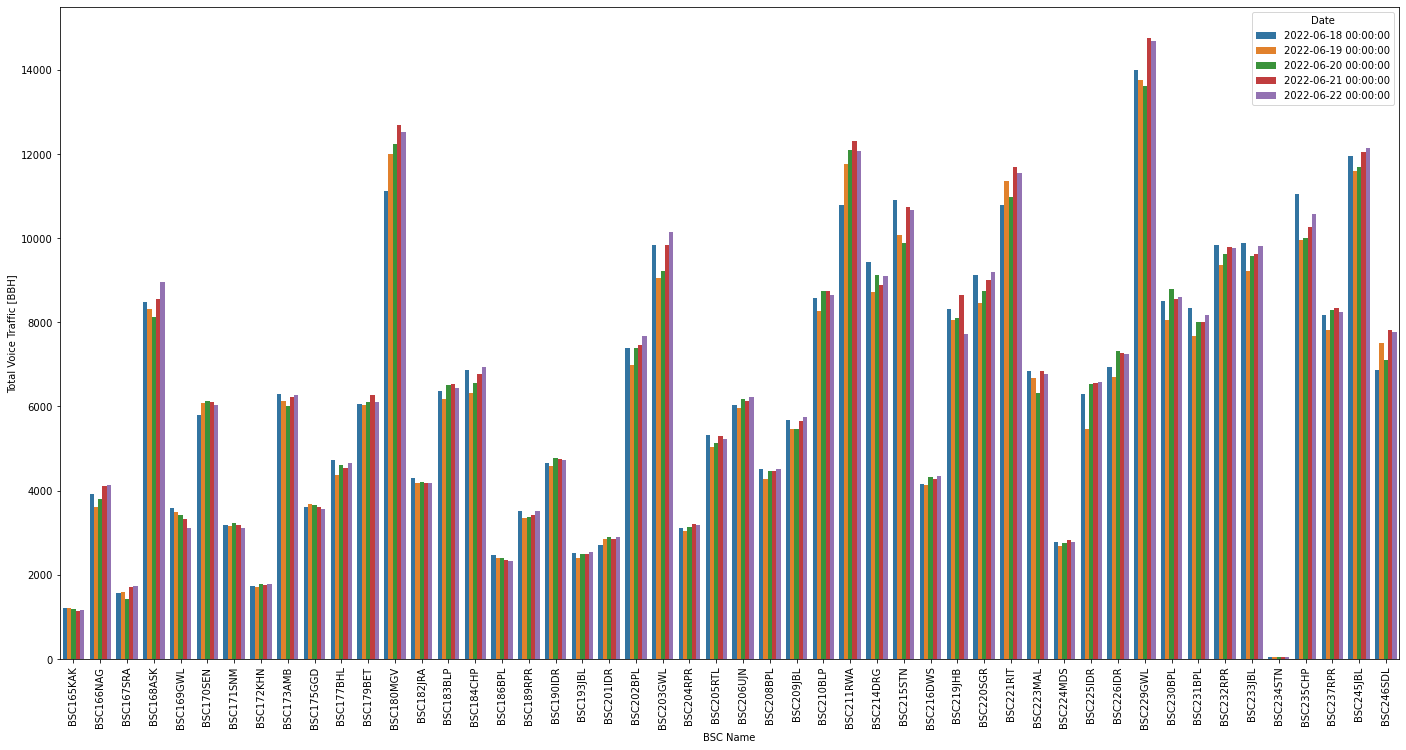

In [22]:
plt.figure(figsize=(24,12))
ax=sns.barplot(x=df["BSC Name"],y=df["Total Voice Traffic [BBH]"],hue=df.index)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

plt.show()

#Below graph is showing Total Voice Traffic of BSCs of MP circle on perticular Dates.

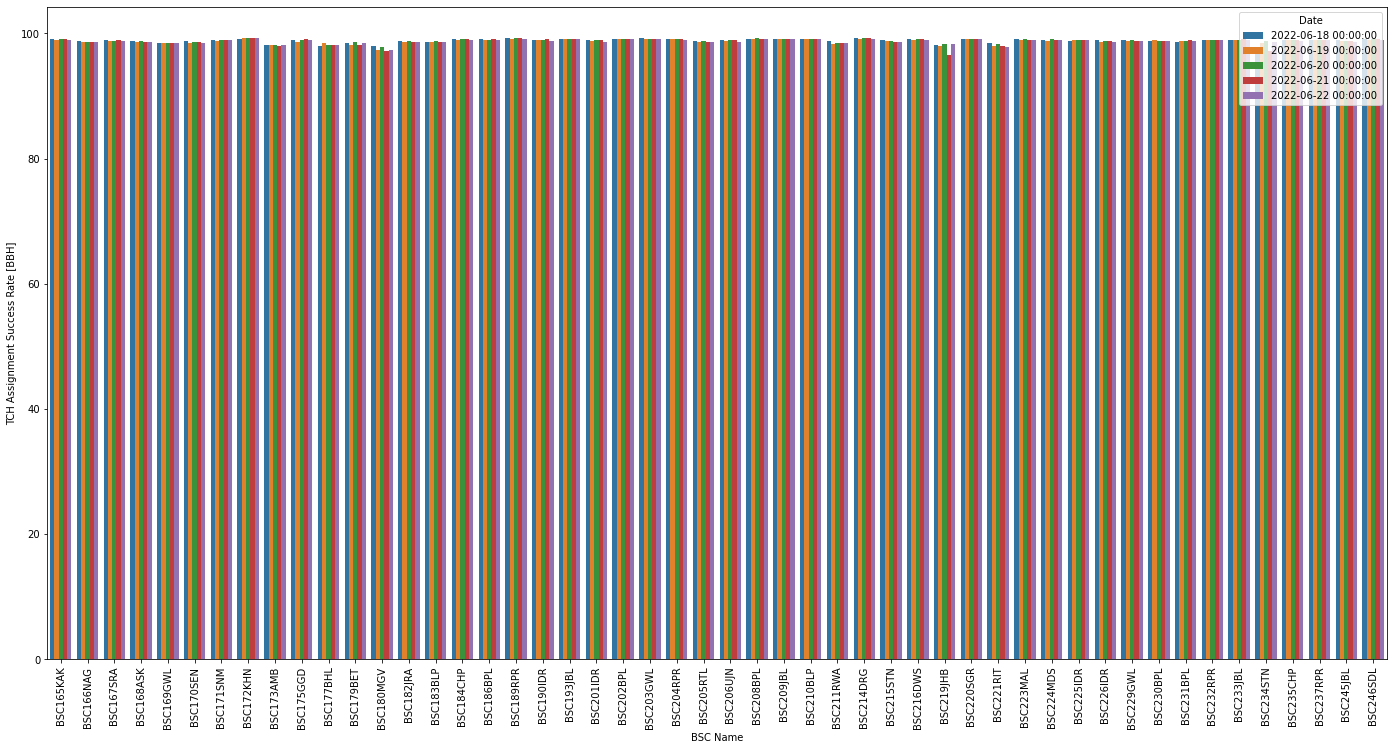

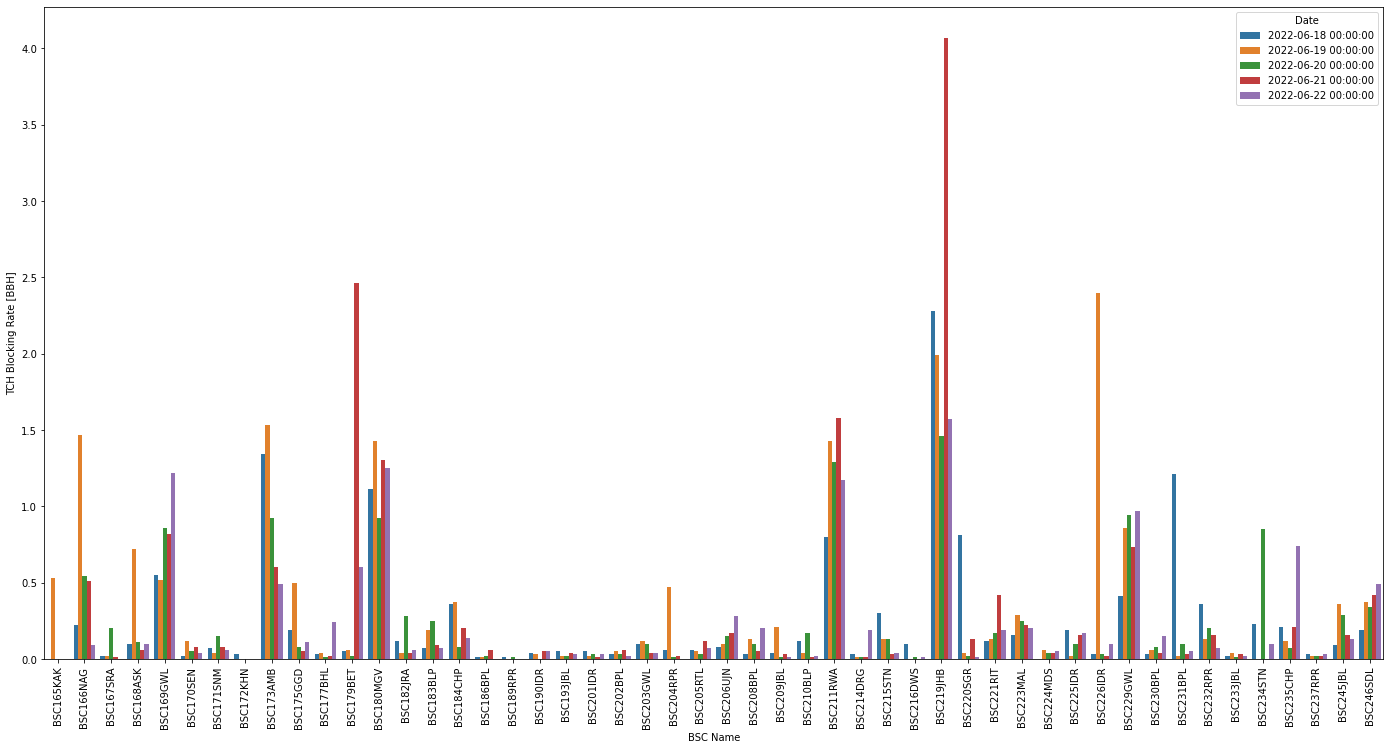

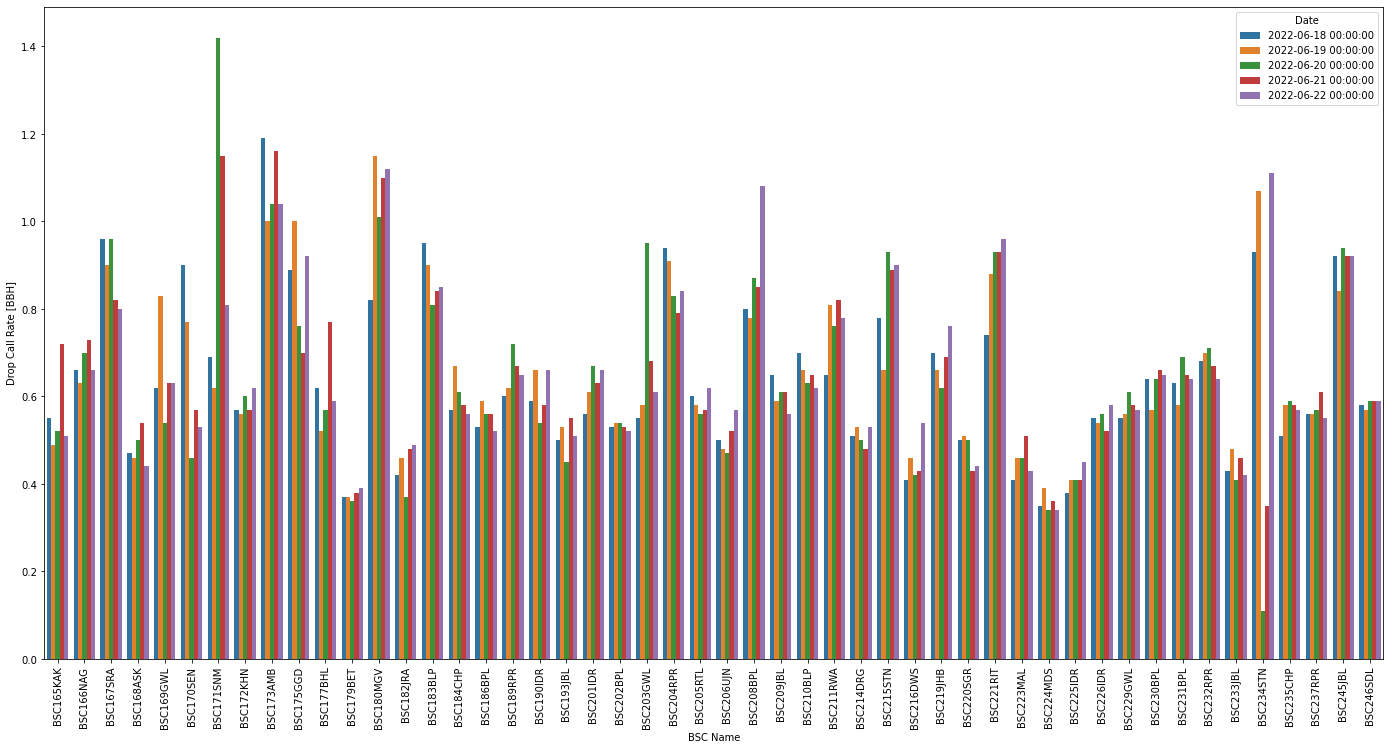

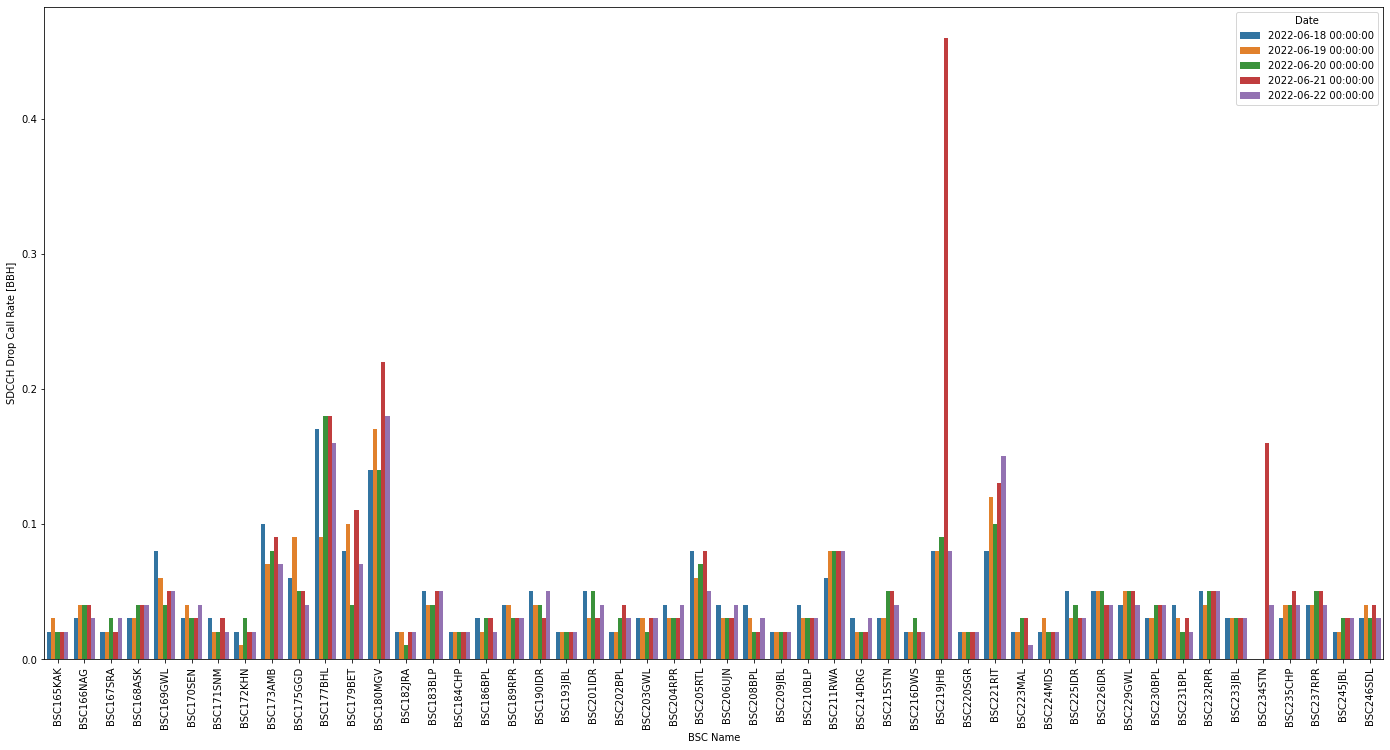

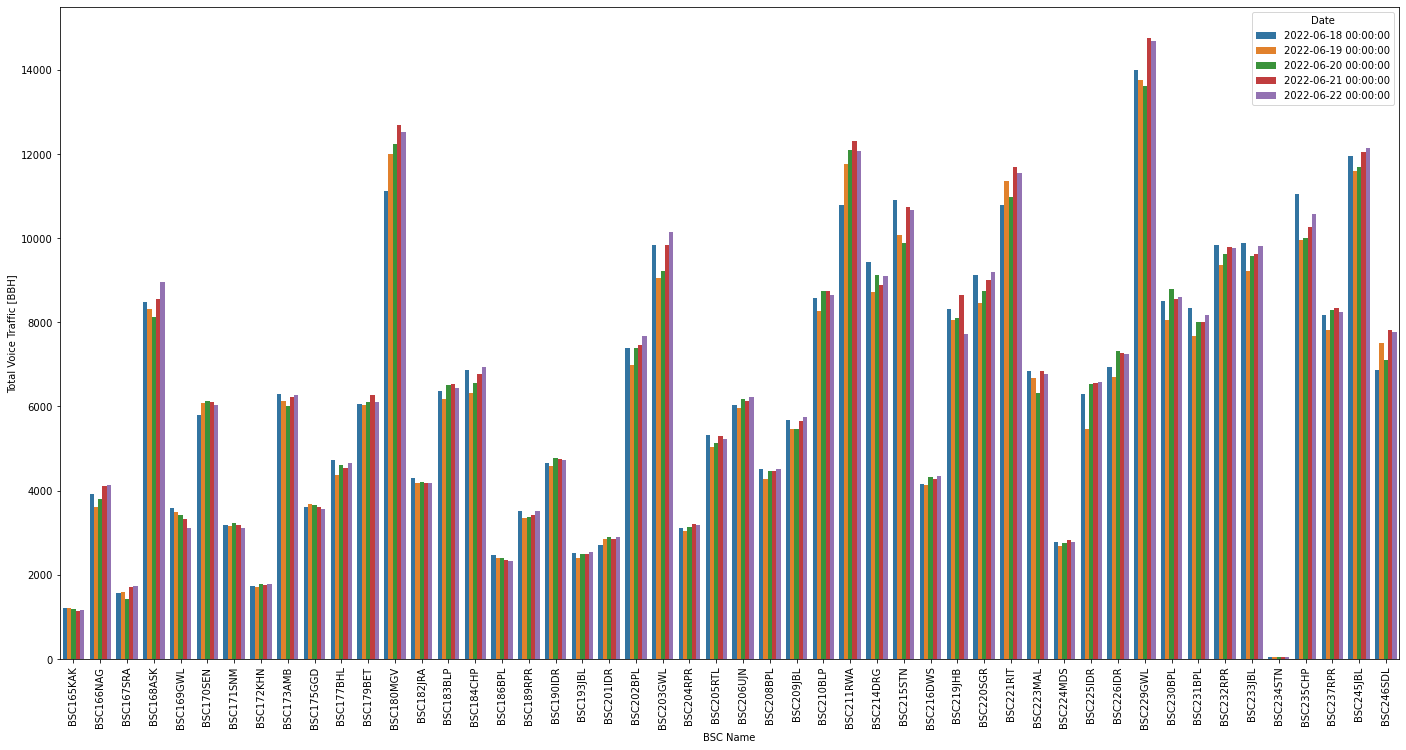

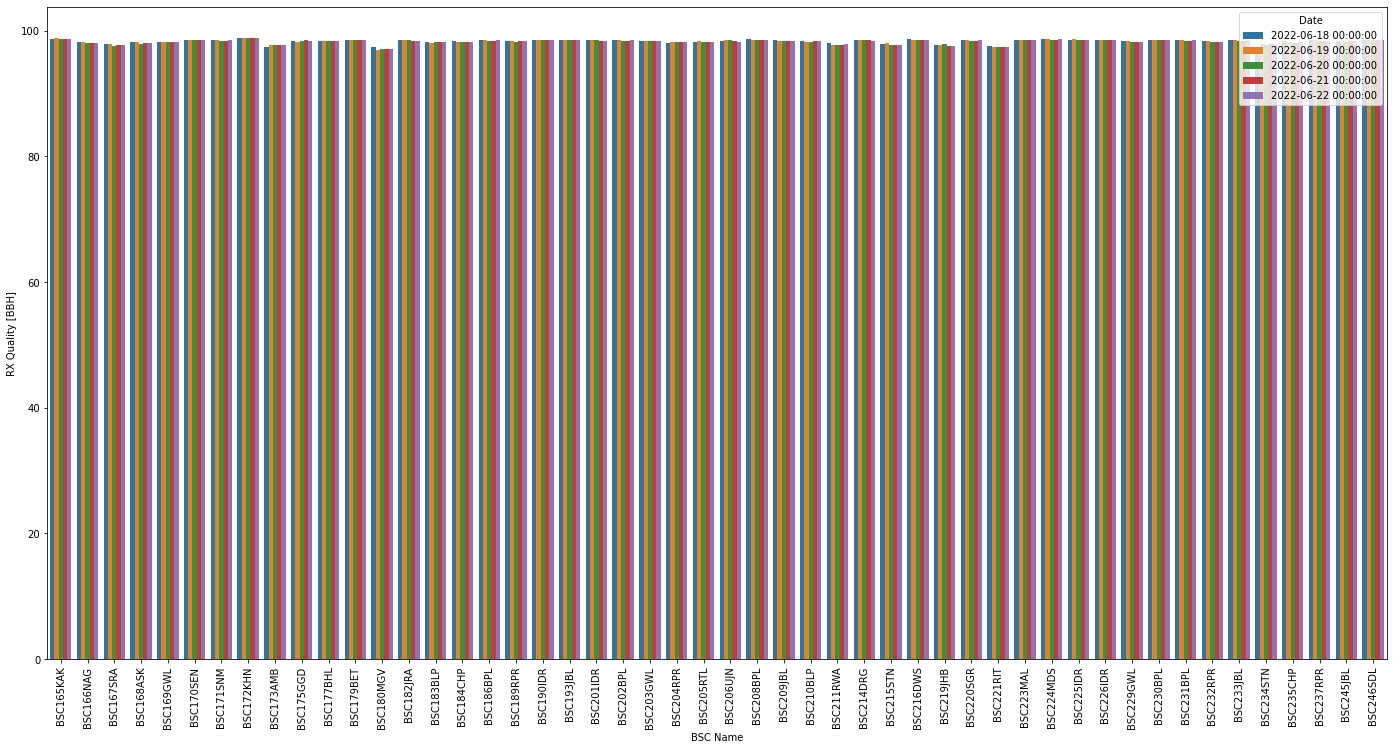

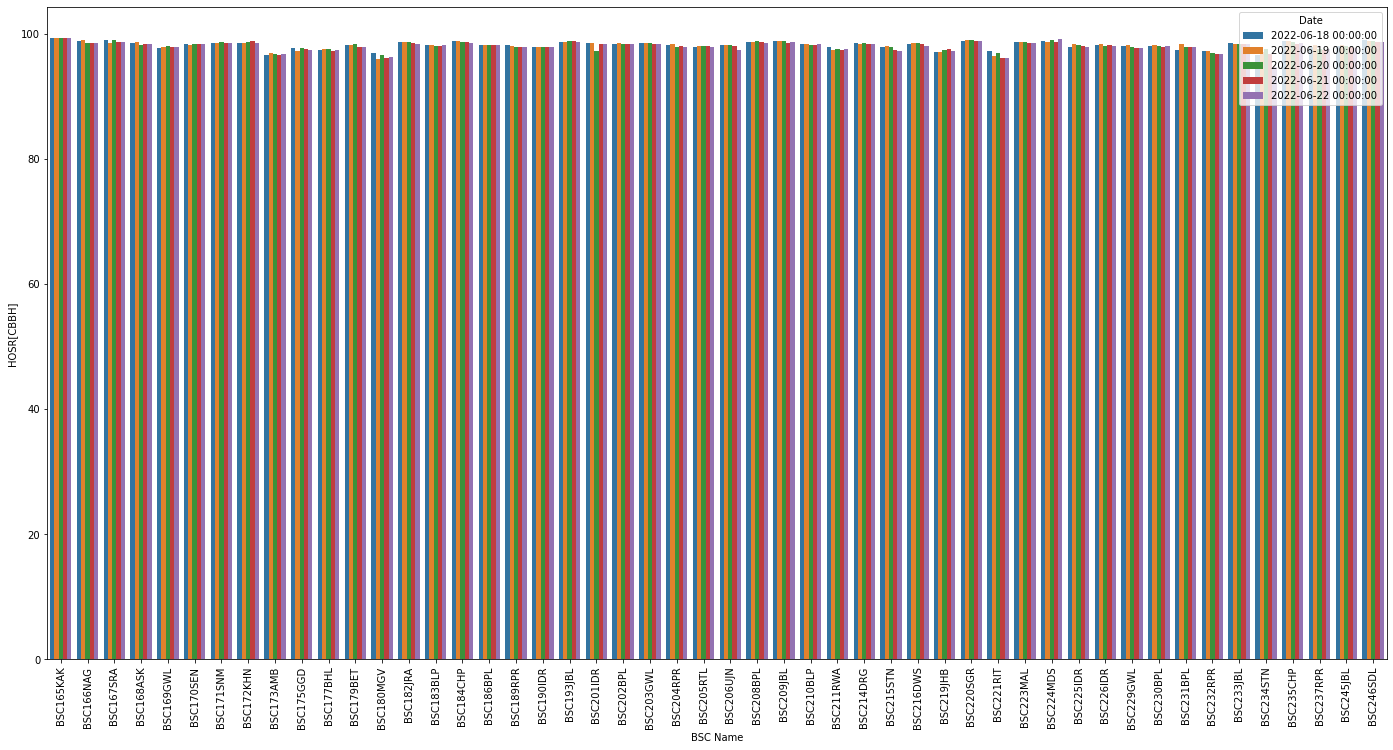

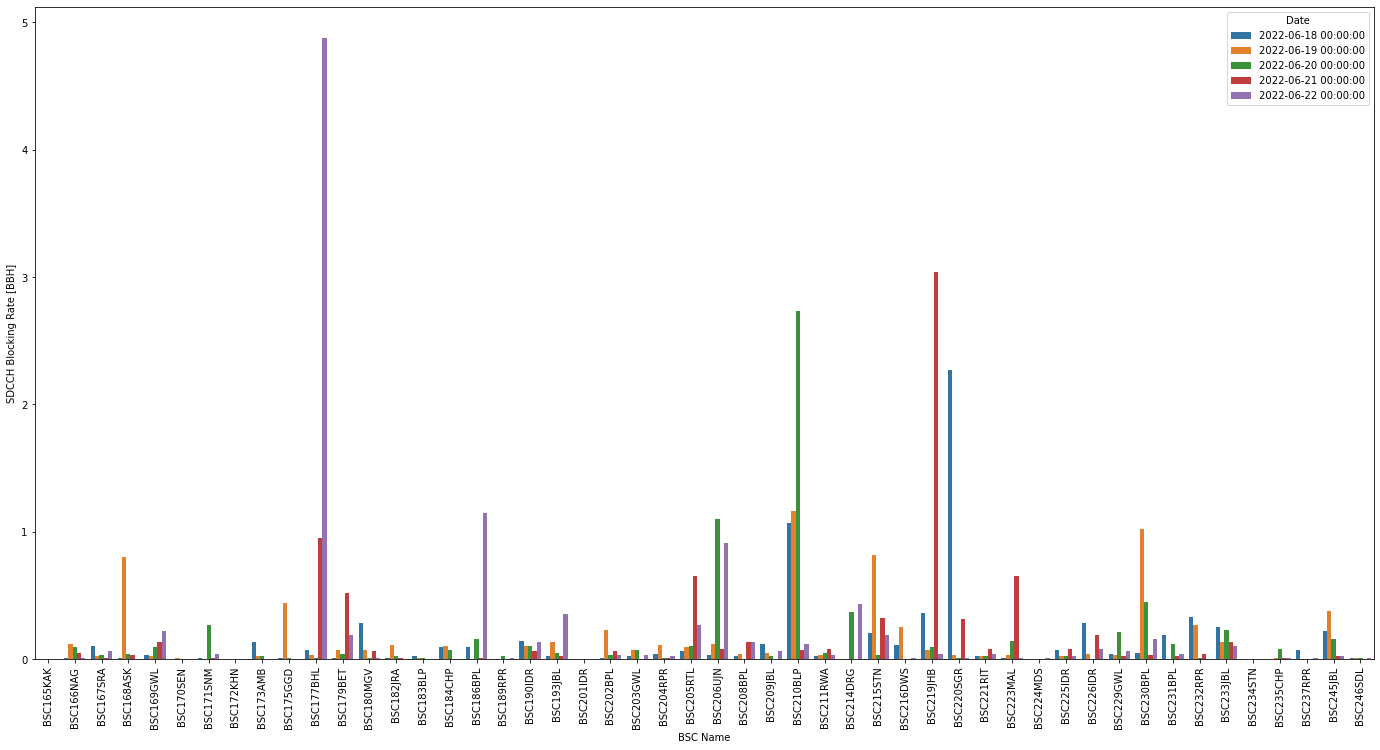

In [23]:
for i in df.columns[1:]:
    plt.figure(figsize=(24,12))
    ax=sns.barplot(x=df["BSC Name"],y=df[i],hue=df.index)
    ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

    plt.show()
    
#Analysing all fetures with their BSCs on given dates.




Plot 1:-It is Between BSCs and TCH Assignment Success rate[BBH] and its found ok no abnormality observed.

Plot 2:-It is Between BSCs and TCH Blocking rate[BBH]  and we can observed on 21 June in BSC219JHB have highest TCH Blocking.

Plot 3:-It is Between BSCs and Drop Call rate[BBH]  and we can observed on 20 June in BSC171SNM have  Drop Call rate Maximum.

Plot 4:-It is Between BSCs and SDCCH DROP Call rate[BBH]  and we can observed on 21 June in BSC219JHB have maximum SDCCH Drop Call Rate.

Plot 5:-It is Between BSCs and SDCCH DROP Call rate[BBH]  and we can observed on 21 June in BSC219JHB have maximum SDCCH Drop Call Rate.

Plot 6:-It is Between BSCs and Total Voice Traffic[BBH]  and we can observed BSC229GWL have maximum Voice traffic .

Plot 7:-It is Between BSCs and RX Quality[BBH] and its found ok no abnormality observed.

Plot 8:-It is Between BSCs and HOSR[BBH] and its found ok no abnormality observed.#HOSR means Hand over Success Rate.

Plot 9:-It is Between BSCs and SDCCH Blocking rate and we observed that SDCCH Blocking  Rate is highest on 22 June in BSC171BHL.




In [24]:
ndf=df.reset_index()

In [25]:
ndf

,Date,BSC Name,TCH Assignment Success Rate [BBH],TCH Blocking Rate [BBH],Drop Call Rate [BBH],SDCCH Drop Call Rate [BBH],Total Voice Traffic [BBH],RX Quality [BBH],HOSR[CBBH],SDCCH Blocking Rate [BBH]
0,2022-06-18,BSC165KAK,99.05,0.00,0.55,0.02,1205.72,98.69,99.34,0.00
1,2022-06-19,BSC165KAK,99.02,0.53,0.49,0.03,1202.26,98.76,99.35,0.00
2,2022-06-20,BSC165KAK,99.06,0.00,0.52,0.02,1186.81,98.73,99.39,0.00
3,2022-06-21,BSC165KAK,99.12,0.00,0.72,0.02,1137.52,98.73,99.35,0.00
4,2022-06-22,BSC165KAK,99.00,0.00,0.51,0.02,1156.96,98.70,99.38,0.00
...,...,...,...,...,...,...,...,...,...,...
245,2022-06-18,BSC246SDL,99.14,0.19,0.58,0.03,6864.86,98.55,98.95,0.01
246,2022-06-19,BSC246SDL,99.02,0.37,0.57,0.04,7507.14,98.52,98.78,0.01
247,2022-06-20,BSC246SDL,99.17,0.34,0.59,0.03,7092.38,98.48,98.84,0.01
248,2022-06-21,BSC246SDL,99.05,0.42,0.59,0.04,7814.31,98.51,98.69,0.00


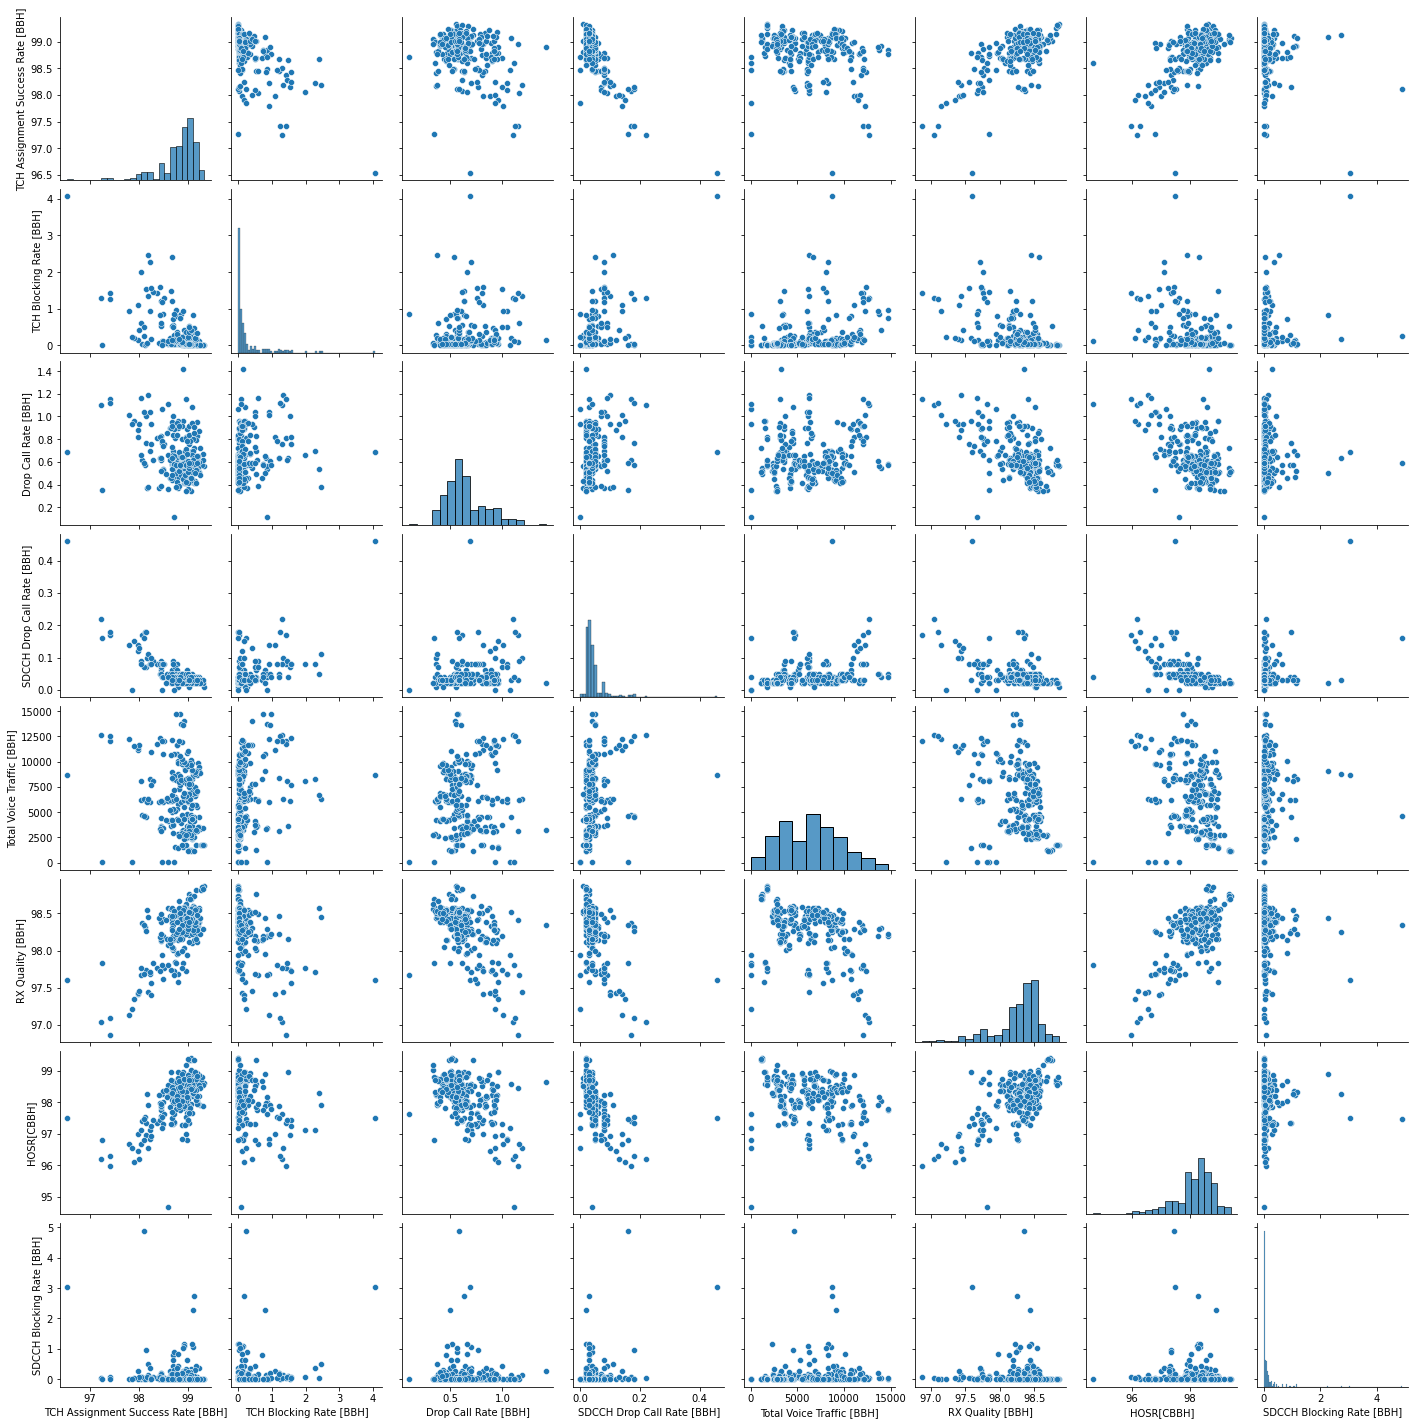

In [26]:
sns.pairplot(ndf)
#showing relationship between all numerical features

array([[<AxesSubplot:title={'center':'Date'}>,
        <AxesSubplot:title={'center':'TCH Assignment Success Rate [BBH]'}>,
        <AxesSubplot:title={'center':'TCH Blocking Rate [BBH]'}>],
       [<AxesSubplot:title={'center':'Drop Call Rate [BBH]'}>,
        <AxesSubplot:title={'center':'SDCCH Drop Call Rate [BBH]'}>,
        <AxesSubplot:title={'center':'Total Voice Traffic [BBH]'}>],
       [<AxesSubplot:title={'center':'RX Quality [BBH]'}>,
        <AxesSubplot:title={'center':'HOSR[CBBH]'}>,
        <AxesSubplot:title={'center':'SDCCH Blocking Rate [BBH]'}>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

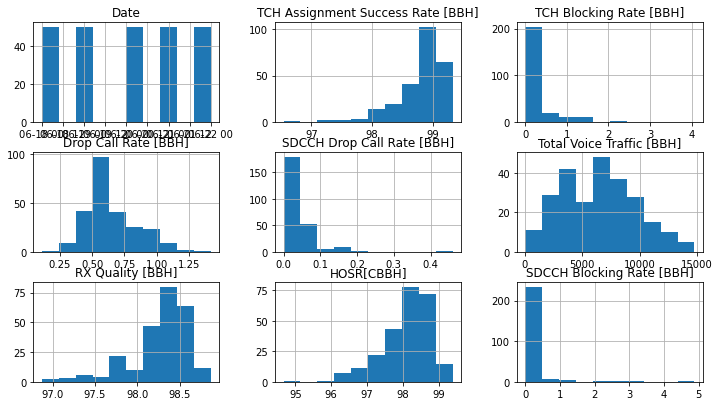

In [27]:
ndf.hist(bins=10,figsize=(12,9),layout=(4,3))

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total Voice Traffic [BBH]', ylabel='Density'>

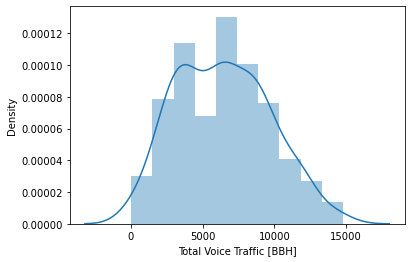

In [28]:
sns.distplot(df["Total Voice Traffic [BBH]"])


In [29]:
#Find Out Top 5 BSC which having Maximum avg Total voice traffic

In [30]:
df["Total Voice Traffic [BBH]"].groupby(df["BSC Name"]).mean().sort_values(ascending=False).head()
#BSC229GWL have Heighest Voice Traffic

BSC Name
BSC229GWL    14159.320
BSC180MGV    12111.466
BSC245JBL    11890.806
BSC211RWA    11802.622
BSC221RIT    11269.706
Name: Total Voice Traffic [BBH], dtype: float64

In [31]:
#Find Out top 5 BSC which having minimum avg Total voice traffic

In [32]:
df["Total Voice Traffic [BBH]"].groupby(df["BSC Name"]).mean().sort_values(ascending=False).tail()
#BSC234STN having lowest voice traffic

BSC Name
BSC186BPL    2394.382
BSC172KHN    1746.604
BSC167SRA    1602.476
BSC165KAK    1177.854
BSC234STN      40.286
Name: Total Voice Traffic [BBH], dtype: float64

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


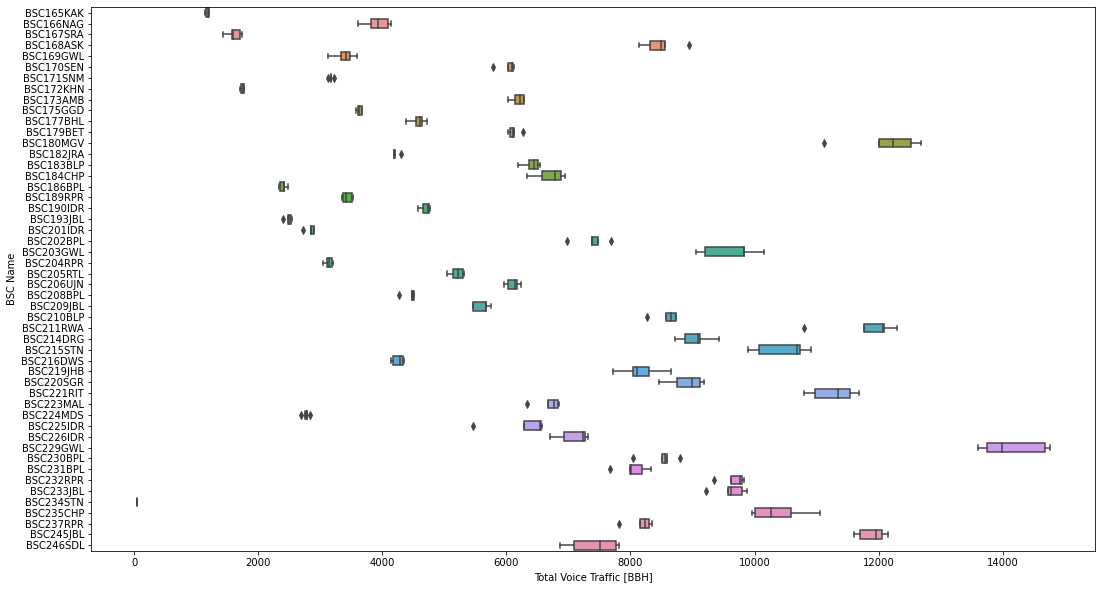

In [33]:
plt.figure(figsize=(18,10))
sns.boxplot(df["Total Voice Traffic [BBH]"],y=df["BSC Name"])
plt.show()

In [34]:
df.describe()

,TCH Assignment Success Rate [BBH],TCH Blocking Rate [BBH],Drop Call Rate [BBH],SDCCH Drop Call Rate [BBH],Total Voice Traffic [BBH],RX Quality [BBH],HOSR[CBBH],SDCCH Blocking Rate [BBH]
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,98.803720,0.274240,0.644520,0.045400,6399.295600,98.269240,98.119480,0.155440
std,0.389462,0.501057,0.193312,0.043103,3246.910982,0.341752,0.682018,0.460636
min,96.540000,0.000000,0.110000,0.000000,37.340000,96.870000,94.670000,0.000000
25%,98.682500,0.030000,0.520000,0.020000,3609.295000,98.150000,97.860000,0.010000
50%,98.910000,0.080000,0.595000,0.030000,6271.885000,98.375000,98.270000,0.030000
75%,99.060000,0.220000,0.755000,0.050000,8701.812500,98.490000,98.577500,0.110000
max,99.330000,4.070000,1.420000,0.460000,14762.170000,98.870000,99.390000,4.880000


C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


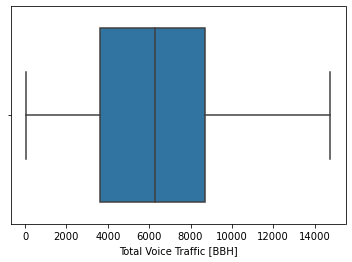

In [35]:
plt.figure(figsize=(6,4))
sns.boxplot(df["Total Voice Traffic [BBH]"])
plt.show()

##Detecting Outlier using Quantile method

In [36]:
upper_limit=df["Total Voice Traffic [BBH]"].quantile(0.99)
upper_limit

13870.342899999998

In [37]:
lower_limit=df["Total Voice Traffic [BBH]"].quantile(0.01)
lower_limit

40.5319

In [38]:
df[(df["Total Voice Traffic [BBH]"] >= 13870.34) | (df["Total Voice Traffic [BBH]"] <= 40.53)]

,BSC Name,TCH Assignment Success Rate [BBH],TCH Blocking Rate [BBH],Drop Call Rate [BBH],SDCCH Drop Call Rate [BBH],Total Voice Traffic [BBH],RX Quality [BBH],HOSR[CBBH],SDCCH Blocking Rate [BBH]
Date,,,,,,,,,
2022-06-18,BSC229GWL,98.91,0.41,0.55,0.04,13982.94,98.30,98.03,0.04
2022-06-21,BSC229GWL,98.84,0.73,0.58,0.05,14762.17,98.20,97.75,0.02
2022-06-22,BSC229GWL,98.76,0.97,0.57,0.04,14689.48,98.23,97.77,0.06
2022-06-19,BSC234STN,98.47,0.00,1.07,0.00,37.34,97.94,97.17,0.00
2022-06-20,BSC234STN,98.72,0.85,0.11,0.00,39.89,97.67,97.63,0.00
2022-06-21,BSC234STN,97.26,0.00,0.35,0.16,39.01,97.84,96.81,0.00


In [39]:
New_df=df[(df["Total Voice Traffic [BBH]"] <= 13870.34) & (df["Total Voice Traffic [BBH]"] >= 40.53)]

In [40]:
New_df.shape

(244, 9)

In [41]:
New_df.head()

,BSC Name,TCH Assignment Success Rate [BBH],TCH Blocking Rate [BBH],Drop Call Rate [BBH],SDCCH Drop Call Rate [BBH],Total Voice Traffic [BBH],RX Quality [BBH],HOSR[CBBH],SDCCH Blocking Rate [BBH]
Date,,,,,,,,,
2022-06-18,BSC165KAK,99.05,0.00,0.55,0.02,1205.72,98.69,99.34,0.0
2022-06-19,BSC165KAK,99.02,0.53,0.49,0.03,1202.26,98.76,99.35,0.0
2022-06-20,BSC165KAK,99.06,0.00,0.52,0.02,1186.81,98.73,99.39,0.0
2022-06-21,BSC165KAK,99.12,0.00,0.72,0.02,1137.52,98.73,99.35,0.0
2022-06-22,BSC165KAK,99.00,0.00,0.51,0.02,1156.96,98.70,99.38,0.0


In [42]:
New_df.reset_index(inplace=True)

In [43]:
New_df.head()

,Date,BSC Name,TCH Assignment Success Rate [BBH],TCH Blocking Rate [BBH],Drop Call Rate [BBH],SDCCH Drop Call Rate [BBH],Total Voice Traffic [BBH],RX Quality [BBH],HOSR[CBBH],SDCCH Blocking Rate [BBH]
0,2022-06-18,BSC165KAK,99.05,0.00,0.55,0.02,1205.72,98.69,99.34,0.0
1,2022-06-19,BSC165KAK,99.02,0.53,0.49,0.03,1202.26,98.76,99.35,0.0
2,2022-06-20,BSC165KAK,99.06,0.00,0.52,0.02,1186.81,98.73,99.39,0.0
3,2022-06-21,BSC165KAK,99.12,0.00,0.72,0.02,1137.52,98.73,99.35,0.0
4,2022-06-22,BSC165KAK,99.00,0.00,0.51,0.02,1156.96,98.70,99.38,0.0


In [44]:
New_df=New_df.drop(["Date","BSC Name"],axis=1)

In [45]:
New_df.head()

,TCH Assignment Success Rate [BBH],TCH Blocking Rate [BBH],Drop Call Rate [BBH],SDCCH Drop Call Rate [BBH],Total Voice Traffic [BBH],RX Quality [BBH],HOSR[CBBH],SDCCH Blocking Rate [BBH]
0,99.05,0.00,0.55,0.02,1205.72,98.69,99.34,0.0
1,99.02,0.53,0.49,0.03,1202.26,98.76,99.35,0.0
2,99.06,0.00,0.52,0.02,1186.81,98.73,99.39,0.0
3,99.12,0.00,0.72,0.02,1137.52,98.73,99.35,0.0
4,99.00,0.00,0.51,0.02,1156.96,98.70,99.38,0.0


## Model Building

In [46]:
New_df.shape

(244, 8)

New_df.info()
#now all columns are Numerical

In [47]:
X=New_df.drop(["Total Voice Traffic [BBH]"],axis=1)
Y=New_df["Total Voice Traffic [BBH]"]

In [48]:
X.shape

(244, 7)

In [49]:
Y

0      1205.72
1      1202.26
2      1186.81
3      1137.52
4      1156.96
        ...   
239    6864.86
240    7507.14
241    7092.38
242    7814.31
243    7767.62
Name: Total Voice Traffic [BBH], Length: 244, dtype: float64

## Train Test split

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [52]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(195, 7)
(49, 7)
(195,)
(49,)


In [53]:
#we have check feature importance and found SDCCH Blocking Rate [BBH] and SDCCH Drop Call Rate [BBH] are less important features

In [54]:
x_train=x_train.drop(["SDCCH Drop Call Rate [BBH]","SDCCH Blocking Rate [BBH]"],axis=1)
x_test=x_test.drop(["SDCCH Drop Call Rate [BBH]","SDCCH Blocking Rate [BBH]"],axis=1)

## Scaling the Data

In [55]:
from sklearn.preprocessing import StandardScaler

In [56]:
std=StandardScaler()

In [57]:
X_train=std.fit_transform(x_train)
X_test=std.transform(x_test)

In [58]:
X_train

array([[ 2.86161061e-02,  1.14468451e+00, -4.06625691e-01,
        -3.53995136e-01,  4.95454064e-01],
       [ 5.58363046e-02, -5.40828914e-01, -3.54596813e-01,
         6.61991746e-01,  2.98254823e-01],
       [ 6.81900869e-01, -5.40828914e-01, -6.14741202e-01,
         7.20048139e-01,  8.61681227e-01],
       [-1.46849481e+00,  2.83019793e+00, -1.46481302e-01,
        -1.28289743e+00, -9.83540245e-01],
       [ 2.73597892e-01, -5.87648731e-01, -6.66770080e-01,
         5.16850763e-01,  2.41912183e-01],
       [-1.11463223e+00, -4.70599188e-01, -1.44720325e+00,
         4.58794369e-01,  1.57398222e-01],
       [ 9.54102854e-01, -5.87648731e-01, -1.46481302e-01,
         1.39484206e-01, -9.61436594e-02],
       [ 8.72442259e-01, -5.40828914e-01, -7.70827836e-01,
         1.68512403e-01,  1.18565141e+00],
       [ 6.27460473e-01,  3.95567430e-01, -3.02567936e-01,
         6.61991746e-01,  8.05338586e-01],
       [ 1.09020385e+00, -5.64238823e-01, -7.70827836e-01,
         4.29766173e-01

In [59]:
X_test

array([[-1.00575144e+00,  2.26836012e+00, -9.44524243e-02,
        -1.50797760e-01, -3.35599881e-01],
       [-4.34127268e-01,  2.85360783e+00, -9.44524243e-02,
        -3.83023333e-01,  1.18565141e+00],
       [ 1.11742405e+00, -5.64238823e-01, -8.74885591e-01,
         4.58794369e-01,  4.53197084e-01],
       [ 8.30565030e-02, -4.70599188e-01, -4.24235465e-02,
         4.00737976e-01, -2.51085920e-01],
       [-2.58242909e-02, -5.40828914e-01, -6.66770080e-01,
         8.36160925e-01,  1.01055582e-01],
       [-2.28510076e+00, -2.83319920e-01,  1.20626952e+00,
        -2.47305349e+00, -2.36393493e+00],
       [ 3.00818091e-01, -3.53549645e-01, -1.23908774e+00,
         6.03935352e-01,  7.28842617e-02],
       [-4.88567665e-01, -4.23779371e-01, -1.46481302e-01,
        -3.83023333e-01, -3.63771201e-01],
       [-5.97448459e-01, -3.76959554e-01,  6.16342091e-02,
        -5.86220709e-01,  5.94053685e-01],
       [-8.02646878e-02, -5.40828914e-01, -1.98510180e-01,
         5.45878959e-01

## ML Model Builduing

### 1. Linear Regression

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

In [61]:
lr=LinearRegression()

In [62]:
model1=lr.fit(X_train,y_train)

In [63]:
y_pred1=model1.predict(X_test)

In [64]:
r2_score(y_test,y_pred1)

0.33217946374902385

In [65]:
mean_squared_error(y_test,y_pred1)

6037325.142059072

## Lets check VIF to remove Multicollinearity

In [66]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [67]:
vif=[]
for i in range(x_train.shape[1]):
    vif.append(variance_inflation_factor(X_train,i))


In [68]:
pd.DataFrame({"vif":vif},index=x_train.columns[0:]).T


,TCH Assignment Success Rate [BBH],TCH Blocking Rate [BBH],Drop Call Rate [BBH],RX Quality [BBH],HOSR[CBBH]
vif,2.812559,1.636568,1.847458,3.113366,2.259743


In [69]:
#We donot have high VIF value so we can say in our data Multicollinearity is not so high

In [70]:
### Lets Try another Model

### 2. KNN 

In [71]:
from sklearn.neighbors import KNeighborsRegressor

In [72]:
KNN = KNeighborsRegressor(n_neighbors=3)

In [73]:
model2=KNN.fit(X_train,y_train)

In [74]:
y_pred2=model2.predict(X_test)

In [75]:
r2_score(y_test,y_pred2)

0.48886877099146786

In [76]:
np.sqrt(mean_squared_error(y_test,y_pred2)) #RMSE

2149.6047143773826

In [77]:
accuracy_score=[]
for i in range(3,30):
    KNN = KNeighborsRegressor(n_neighbors=i)
    model2=KNN.fit(X_train,y_train)
    y_pred2=model2.predict(X_test)
    accuracy_score.append(r2_score(y_test,y_pred2))


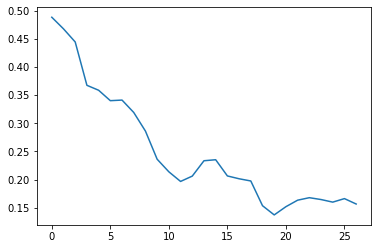

In [78]:
plt.plot(accuracy_score)
#we can see accuracy score near n_neighbors=5 is highest

In [79]:
## Lets Try another Model Decision Tree Regressor

### 3.Decision Tree Regressor

In [80]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [81]:
DTR=DecisionTreeRegressor()


In [82]:
parameter= ({"max_depth":[10,20,30,None],"max_features":[0.7,0.8,0.9],})


In [83]:
Model3 = GridSearchCV(DTR,parameter,cv=3)

In [84]:
Model3.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [10, 20, 30, None],
                         'max_features': [0.7, 0.8, 0.9]})

In [85]:
print(Model3.best_params_)


{'max_depth': 20, 'max_features': 0.8}


In [86]:
y_pred3=Model3.predict(X_test)

In [87]:
r2_score(y_test,y_pred3) #R2 score is negative means its a worst model lets try something else

-0.2731032843140462

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total Voice Traffic [BBH]', ylabel='Density'>

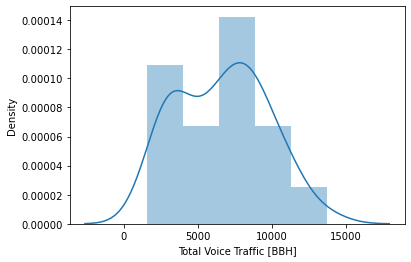

In [88]:
sns.distplot(y_test)

In [89]:
Model3=DTR.fit(X_train,y_train)

In [90]:
y_pred3=Model3.predict(X_test)

In [91]:
r2_score(y_test,y_pred3)

-0.16856017659264055

In [92]:
labels = list(x_train)
feature_importances = pd.DataFrame({'feature': labels, 'importance': DTR.feature_importances_})
feature_importances=feature_importances[feature_importances.importance>0.015]
feature_importances

,feature,importance
0,TCH Assignment Success Rate [BBH],0.201257
1,TCH Blocking Rate [BBH],0.275520
2,Drop Call Rate [BBH],0.110782
3,RX Quality [BBH],0.187713
4,HOSR[CBBH],0.224728


In [93]:
#SDCCH Blocking Rate [BBH] and SDCCH Drop Call Rate [BBH] are less important features

In [94]:
x_train

,TCH Assignment Success Rate [BBH],TCH Blocking Rate [BBH],Drop Call Rate [BBH],RX Quality [BBH],HOSR[CBBH]
228,98.83,0.74,0.57,98.16,98.47
208,98.84,0.02,0.58,98.51,98.33
96,99.07,0.02,0.53,98.53,98.73
167,98.28,1.46,0.62,97.84,97.42
84,98.92,0.00,0.52,98.46,98.29
...,...,...,...,...,...
106,99.05,0.05,0.54,98.49,98.49
14,98.87,0.00,0.80,97.76,98.72
92,98.97,0.00,0.54,98.57,97.84
179,97.90,0.19,0.96,97.35,96.10


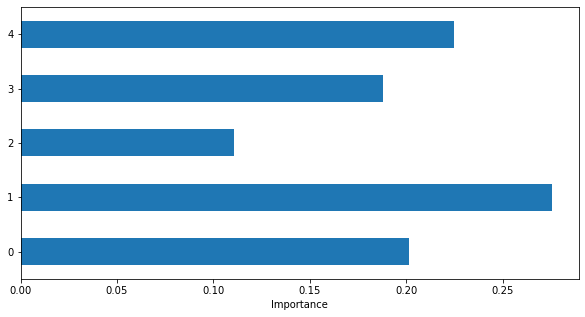

In [95]:
feature_importances.importance.plot(kind='barh', figsize=(10, 5))
plt.xlabel('Importance');

### 4. Random Forest


In [96]:
from sklearn.ensemble import RandomForestRegressor


In [97]:
rfc=RandomForestRegressor()

In [98]:
parameters=({"n_estimators":[150,200,300],"max_depth":[20,30,40,None]})

In [99]:
rfr=GridSearchCV(estimator=rfc,param_grid=parameters,cv=5,verbose=True)

In [100]:
Model4=rfr.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


In [101]:
Model4.best_params_

{'max_depth': None, 'n_estimators': 300}

In [102]:
y_pred4=Model4.predict(X_test)

In [103]:
r2_score(y_test,y_pred4)

0.40773356347530776

### 5. Support Vactor Regressor

In [104]:
from sklearn.svm import SVR

In [105]:
svr=SVR(C=0.1,kernel="poly",degree=5)

In [106]:
Model5=svr.fit(X_train,y_train)

In [107]:
y_pred5=Model5.predict(X_test)

In [108]:
r2_score(y_test,y_pred5)

-3.049243262647553

In [109]:
#This Model also not predicting good

### 6. XG BOOST REGRESSOR

In [110]:
import xgboost

In [111]:
print(xgboost.__version__)

1.6.0


In [112]:
from xgboost import XGBRegressor

In [113]:
model6=XGBRegressor(n_estimators=1000, max_depth=60, eta=0.1, subsample=0.7, colsample_bytree=0.8)

In [114]:
model6.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
             early_stopping_rounds=None, enable_categorical=False, eta=0.1,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.100000001, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=60, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=1000,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0, ...)

In [115]:
y_pred6=model6.predict(X_test)

In [116]:
r2_score(y_test,y_pred6)

0.45685812937856396

In [117]:
# KNN giving us best result on this data